#### First, make sure that sgan is installed in your python environment.
I assume you have installed mapsgan in the same way (which is necessary too), so this might be familiar to you.
- Therefore, open a console, make a folder "sgan" in your project.
- Execute 'git clone https://github.com/jkoal/mapsgan.git'. I created a branch "sgan" in mapsgan with my annotated sgan code. A new repository for that would be a bit more elegant, but I am too lazy rn to do that. And a fork cant be private and I dont wanna go public with it. Make 'git checkout sgan' and make sure to stay on this branch in this directory.
- Activate your environment.
- Find out the env path by 'which python'. It is something like "~/anaconda3/envs/mapsgan/bin/python"
- Install package by creating a sgan.pth in site-packages which contains a single line to the sgan folder (the one with the "\__init\__.py" file). Easiest way to do so is when you are in the sgan directory, then type 'echo $PWD > /home/yy/anaconda3/envs/mapsgan/lib/python3.7/site-packages/sgan.pth' (path may vary). (Todo: add a setup file for the package.)


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from torch import nn
from mapsgan import SGANSolver, data_loader
from sgan import TrajectoryGenerator, TrajectoryDiscriminator
import mapsgan.experiments as experiments
from mapsgan.evaluation import Visualization

In [2]:
experiment = experiments.ETH() # we store filepaths and arguments in here
experiment.init_default_args() # those are some default SGAN parameters used in SGANSolver
dataset, trainloader = data_loader(in_len=8, out_len=12, batch_size=64, num_workers=1, path=experiment.test_dir)

In [3]:
generator = TrajectoryGenerator(obs_len=8,
                                pred_len=12,
                                embedding_dim=16,
                                encoder_h_dim=32,
                                decoder_h_dim=32,
                                mlp_dim=64,
                                num_layers=1,
                                noise_dim=(8,),
                                noise_type='gaussian',
                                noise_mix_type='global',
                                pooling_type='pool_net',
                                pool_every_timestep=1,
                                dropout=0,
                                bottleneck_dim=32,
                                neighborhood_size=2,
                                grid_size=8,
                                batch_norm=0)

discriminator = TrajectoryDiscriminator(obs_len=8,
                                        pred_len=12,
                                        embedding_dim=16,
                                        h_dim=64,
                                        mlp_dim=64,
                                        num_layers=1,
                                        dropout=0,
                                        batch_norm=0,
                                        d_type='local')

models = dict(generator = generator, discriminator = discriminator) # lmk if too cumbersome to pass both in a dict

In [4]:
solver = SGANSolver(models=models,experiment=experiment, # pls read the code and docstrings to get the idea
                loss_fns={'norm': nn.L1Loss, 'gan': nn.BCEWithLogitsLoss},
                optims_args={'generator': {'lr': 1e-2}, 'discriminator': {'lr': 0}})

In [6]:
solver.train(trainloader, num_epochs = 100, checkpoint_every=5, steps = {'generator': 1, 'discriminator': 1})

G_gan: 0.642	G_norm: 21.863	G_total: 22.505	D_real: 0.622	D_fake: 0.750	D_total: 1.371	
G_gan: 0.621	G_norm: 12.170	G_total: 12.791	D_real: 0.657	D_fake: 0.729	D_total: 1.386	
G_gan: 0.655	G_norm: 6.775	G_total: 7.430	D_real: 0.653	D_fake: 0.730	D_total: 1.384	
G_gan: 0.661	G_norm: 6.037	G_total: 6.698	D_real: 0.656	D_fake: 0.721	D_total: 1.376	
G_gan: 0.641	G_norm: 3.858	G_total: 4.499	D_real: 0.627	D_fake: 0.753	D_total: 1.380	
G_gan: 0.663	G_norm: 3.087	G_total: 3.750	D_real: 0.645	D_fake: 0.734	D_total: 1.379	
G_gan: 0.626	G_norm: 2.745	G_total: 3.371	D_real: 0.620	D_fake: 0.723	D_total: 1.343	
G_gan: 0.650	G_norm: 2.202	G_total: 2.852	D_real: 0.666	D_fake: 0.719	D_total: 1.385	
G_gan: 0.644	G_norm: 2.811	G_total: 3.455	D_real: 0.663	D_fake: 0.731	D_total: 1.394	
G_gan: 0.630	G_norm: 2.347	G_total: 2.977	D_real: 0.649	D_fake: 0.726	D_total: 1.375	
G_gan: 0.635	G_norm: 2.469	G_total: 3.105	D_real: 0.640	D_fake: 0.735	D_total: 1.375	
G_gan: 0.655	G_norm: 4.325	G_total: 4.980	D_real: 

#### Visualize things.
As we talked about, I implemented a simple plotting class that is supposed to integrate with the rest. E.g. vis.loss takes the dictionary 'solver.train_loss_history' of the solver object to plot all losses.
- For everything that you would like to visualize, think about how we could implement it in the class Visualization.

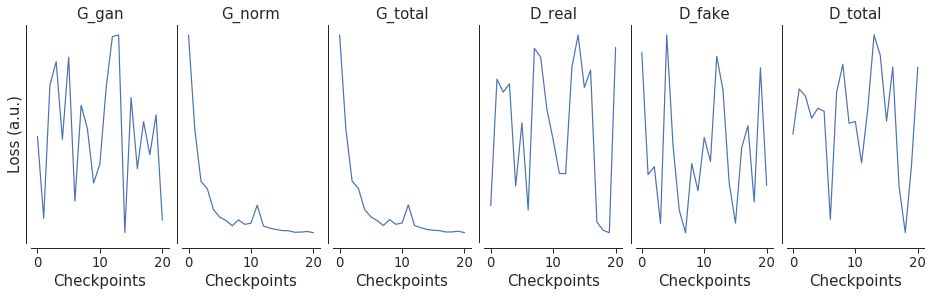

In [8]:
vis = Visualization()
vis.loss(solver.train_loss_history)